In [36]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:

# one contains features and the other contains the corresponding labels
features = pd.read_csv('data_training_set_features.csv')
labels = pd.read_csv('data/training_set_labels.csv')
display(features.head())
labels.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [38]:
## concatenate the training features and labels into a single DataFrame for cleaning and exploration
df = pd.concat([features, labels.drop('respondent_id', axis=1)], axis=1)
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [39]:
df.shape

(26707, 38)

mark

In [40]:
#focus of problem is on seasonal flu vaccines,information most specific to h1n1 won't be needed
# drop h1n1 cols from df
df.drop(columns=['opinion_h1n1_vacc_effective',
                 'opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc',
                 'doctor_recc_h1n1',
                 'h1n1_vaccine'], axis=1, inplace=True)


df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [41]:
df.shape

(26707, 33)

In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

mark

The variables `hhs_geo_region`, `employment_industry`, and `employment_occupation` are encoded as random strings and correspond to specific geographic regions, industries, and occupations. The CDC has not provided the meanings of these strings to protect the anonymity of respondents. Nonetheless, our model can utilize this information to enhance prediction accuracy. Including these variables in our analysis will allow us to determine their relevance in predicting an individual's likelihood of obtaining a vaccine, even if we cannot establish a direct connection to specific regions or jobs.

# Cleaning

In [44]:
def check_null(df):
       
    missing_vals = pd.DataFrame()
    missing_vals['Number of Nulls'] = df.isna().sum()
    missing_vals['% Null'] = (df.isna().sum() / len(df)) * 100
    
    return missing_vals

check_null(df)

,Number of Nulls,% Null
respondent_id,0,0.000000
h1n1_concern,92,0.344479
h1n1_knowledge,116,0.434343
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275


Since the complete dataset contains a significant number of observations (26,707), and most columns have only a small proportion of missing values, any record with missing information in columns containing less than 5% missing values will be excluded. As demonstrated earlier, the affected columns include:
 - `h1n1_concern`
 - `h1n1_knowledge`
 - `behavioral_antiviral_meds`
 - `behavioral_avoidance`
 - `behavioral_face_mask` 
 - `behavioral_wash_hands`
 - `behavioral_large_gatherings` 
 - `behavioral_outside_home`
 - `behavioral_touch_face` 
 - `chronic_med_condition`
 - `child_under_6_months` 
 - `health_worker` 
 - `opinion_seas_vacc_effective`
 - `opinion_seas_risk` 
 - `opinion_seas_sick_from_vacc` 
 - `household_adults`
 - `household_children`

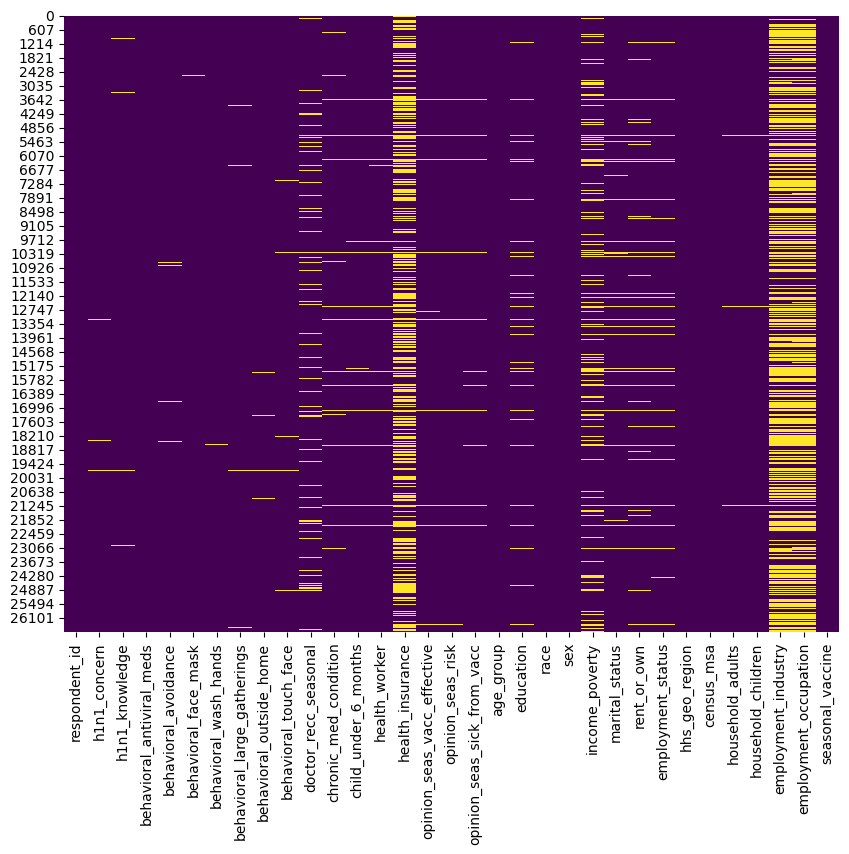

In [45]:
#import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()


In [46]:
# # slice out DataFrame for individuals Not in Labor Force
not_in_labor_force = df[df['employment_status']=='Not in Labor Force']

# # display the number and percent of NaN's in each column
display(check_null(not_in_labor_force))

# # slice out DataFrame for 'Unemployed' individuals
unemployed = df[df['employment_status']=='Unemployed']

# # display the number and percent of NaN's in each column
check_null(unemployed)

not_lab_for_ids = list(not_in_labor_force['respondent_id'].index)
unempl_ids = list(unemployed['respondent_id'].index)
all_not_employed_ids = not_lab_for_ids + unempl_ids
len(all_not_employed_ids)

,Number of Nulls,% Null
respondent_id,0,0.000000
h1n1_concern,56,0.547356
h1n1_knowledge,58,0.566905
behavioral_antiviral_meds,40,0.390969
behavioral_avoidance,104,1.016518
behavioral_face_mask,9,0.087968
behavioral_wash_hands,22,0.215033
behavioral_large_gatherings,46,0.449614
behavioral_outside_home,49,0.478937
behavioral_touch_face,67,0.654872


11684

The columns employment_occupation, employment_industry, and health_insurance have the most missing values, at 50.4%, 49.9%, and 46.0% respectively. However, it is important to note that some of these missing values are not due to respondents declining to answer, but rather because they are not applicable. For example, 10,231 respondents who are classified as 'Not in Labor Force' have missing values for employment_occupation and employment_industry. Similarly, 1,453 unemployed respondents have missing values for these columns. In these cases, it is more appropriate to consider employment_occupation and employment_industry as 'not applicable' rather than missing values.

There are also evident patterns in missing values. For example, respondents who declined to answer about one aspect, such as whether their doctor recommended a specific vaccine, often did the same for other related questions. This trend was also observed for questions regarding chronic medical conditions, having a child under 6 months, being a health worker, opinion questions, income, education, personal and home life questions.

These patterns suggest that treating missing information for certain variables as a distinct category rather than dropping it altogether may be more meaningful. This is because it appears to represent a specific type of respondent that constitutes a noteworthy portion of the sample population

In [47]:
def check_unique(df, col, dropna=False):
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    return unique_vals
    
    
for col in df.columns:
    display(check_unique(df, col))

,respondent_id
0,1
17736,1
17812,1
17811,1
17810,1
...,...
8898,1
8897,1
8896,1
8895,1


,h1n1_concern
2.0,10575
1.0,8153
3.0,4591
0.0,3296
NaN,92


,h1n1_knowledge
1.0,14598
2.0,9487
0.0,2506
NaN,116


,behavioral_antiviral_meds
0.0,25335
1.0,1301
NaN,71


,behavioral_avoidance
1.0,19228
0.0,7271
NaN,208


,behavioral_face_mask
0.0,24847
1.0,1841
NaN,19


,behavioral_wash_hands
1.0,22015
0.0,4650
NaN,42


,behavioral_large_gatherings
0.0,17073
1.0,9547
NaN,87


,behavioral_outside_home
0.0,17644
1.0,8981
NaN,82


,behavioral_touch_face
1.0,18001
0.0,8578
NaN,128


,doctor_recc_seasonal
0.0,16453
1.0,8094
NaN,2160


,chronic_med_condition
0.0,18446
1.0,7290
NaN,971


,child_under_6_months
0.0,23749
1.0,2138
NaN,820


,health_worker
0.0,23004
1.0,2899
NaN,804


,health_insurance
1.0,12697
NaN,12274
0.0,1736


,opinion_seas_vacc_effective
4.0,11629
5.0,9973
2.0,2206
1.0,1221
3.0,1216
NaN,462


,opinion_seas_risk
2.0,8954
4.0,7630
1.0,5974
5.0,2958
3.0,677
NaN,514


,opinion_seas_sick_from_vacc
1.0,11870
2.0,7633
4.0,4852
5.0,1721
NaN,537
3.0,94


,age_group
65+ Years,6843
55 - 64 Years,5563
45 - 54 Years,5238
18 - 34 Years,5215
35 - 44 Years,3848


,education
College Graduate,10097
Some College,7043
12 Years,5797
< 12 Years,2363
NaN,1407


,race
White,21222
Black,2118
Hispanic,1755
Other or Multiple,1612


,sex
Female,15858
Male,10849


,income_poverty
"<= $75,000, Above Poverty",12777
"> $75,000",6810
NaN,4423
Below Poverty,2697


,marital_status
Married,13555
Not Married,11744
NaN,1408


,rent_or_own
Own,18736
Rent,5929
NaN,2042


,employment_status
Employed,13560
Not in Labor Force,10231
NaN,1463
Unemployed,1453


,hhs_geo_region
lzgpxyit,4297
fpwskwrf,3265
qufhixun,3102
oxchjgsf,2859
kbazzjca,2858
bhuqouqj,2846
mlyzmhmf,2243
lrircsnp,2078
atmpeygn,2033
dqpwygqj,1126


,census_msa
"MSA, Not Principle City",11645
"MSA, Principle City",7864
Non-MSA,7198


,household_adults
1.0,14474
0.0,8056
2.0,2803
3.0,1125
NaN,249


,household_children
0.0,18672
1.0,3175
2.0,2864
3.0,1747
NaN,249


,employment_industry
NaN,13330
fcxhlnwr,2468
wxleyezf,1804
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614
vjjrobsf,527


,employment_occupation
NaN,13470
xtkaffoo,1778
mxkfnird,1509
emcorrxb,1270
cmhcxjea,1247
xgwztkwe,1082
hfxkjkmi,766
qxajmpny,548
xqwwgdyp,485
kldqjyjy,469


,seasonal_vaccine
0,14272
1,12435


In [48]:
# if a person is unemployed, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_industry'] = 'not employed'

# if a person is not in the labor force, change their 'employment_industry' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_industry'] = 'not employed'

## if a person is unemployed, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Unemployed', 'employment_occupation'] = 'not employed'

## if a person is not in the labor force, change their 'employment_occupation' to 'not_employed'
df.loc[df['employment_status'] == 'Not in Labor Force', 'employment_occupation'] = 'not employed'

def check_unique(df, col, dropna=False):
    unique_vals = pd.DataFrame(df[col].value_counts(dropna=dropna))
    return unique_vals


check_unique(df, 'employment_industry') 
#check_unique(df, 'employment_occupation')

,employment_industry
not employed,11684
fcxhlnwr,2468
wxleyezf,1804
NaN,1646
ldnlellj,1231
pxcmvdjn,1037
atmlpfrs,926
arjwrbjb,871
xicduogh,851
mfikgejo,614


In [49]:
# create a DataFrame to show columns with % Null between 0 and 5%
null_df = check_null(df)
null_df.drop(index=null_df.loc[null_df['% Null']==0].index, axis=0, inplace=True)
under_5_null = null_df.loc[null_df['% Null']<5]
under_5_null

,Number of Nulls,% Null
h1n1_concern,92,0.344479
h1n1_knowledge,116,0.434343
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275
chronic_med_condition,971,3.635751


In [50]:
## drop records with null values for the above columns, composed of less than 5% null values
under_5_null_cols = list(under_5_null.index)
df.dropna(subset=under_5_null_cols, inplace=True)

## check out the resulting df
display(check_null(df))
df.shape

,Number of Nulls,% Null
respondent_id,0,0.000000
h1n1_concern,0,0.000000
h1n1_knowledge,0,0.000000
behavioral_antiviral_meds,0,0.000000
behavioral_avoidance,0,0.000000
behavioral_face_mask,0,0.000000
behavioral_wash_hands,0,0.000000
behavioral_large_gatherings,0,0.000000
behavioral_outside_home,0,0.000000
behavioral_touch_face,0,0.000000


(24888, 33)

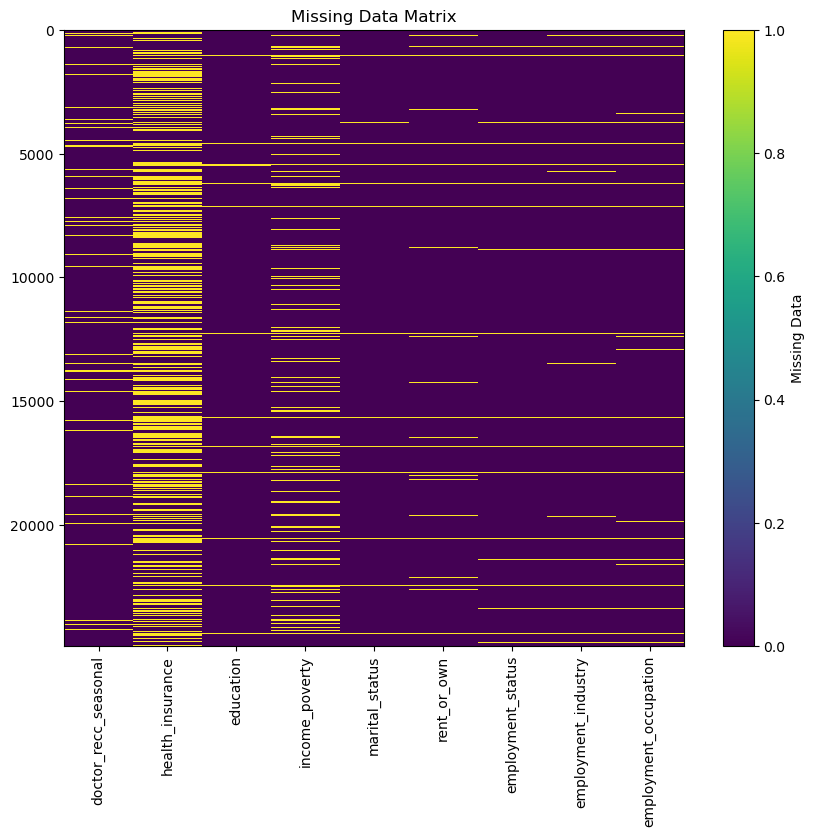

In [51]:
# Create a list of columns without any null values to be dropped
no_null_cols = [col for col in df.columns if df[col].isna().sum() == 0]

# Drop columns without missing info to get a DataFrame with missing values only
df_missing = df.drop(columns=no_null_cols)

# Visualize missing data using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(df_missing.isnull(), cmap='viridis', aspect='auto', interpolation='nearest')
plt.xticks(range(len(df_missing.columns)), df_missing.columns, rotation=90)
plt.colorbar(label="Missing Data")
plt.title("Missing Data Matrix")

plt.show()


For the health_insurance and income_poverty variables, it is reasonable to create a new category for missing values, since these are relatively common. This will allow us to keep all of the data, while still being able to distinguish between respondents who did not answer and those who do not have health insurance or are in poverty.

For the categorical variables education, marital_status, rent_to_own, employment_status, employment_industry, and employment_occupation, it is also reasonable to create a new category for missing values. The pattern of missing values is very similar for these variables, and dropping records with missing values would result in a significant loss of data. Creating a new category for missing values will allow us to keep all of the data, while still being able to distinguish between respondents who did not answer and those who belong to a specific category.

For the doctor_recc_seasonal variable, the pattern of missing values is different from the other categorical variables. In this case, it is probably best to replace the missing values with the string missing. This will allow us to keep the data, while still being able to distinguish between respondents who did not answer and those who did not receive a recommendation from their doctor for a seasonal flu vaccine.

In [52]:
for col in df.columns:
    display(check_unique(df, col))

,respondent_id
0,1
17770,1
17794,1
17793,1
17792,1
...,...
8898,1
8897,1
8896,1
8895,1


,h1n1_concern
2.0,10002
1.0,7666
3.0,4235
0.0,2985


,h1n1_knowledge
1.0,13735
2.0,9051
0.0,2102


,behavioral_antiviral_meds
0.0,23693
1.0,1195


,behavioral_avoidance
1.0,18187
0.0,6701


,behavioral_face_mask
0.0,23199
1.0,1689


,behavioral_wash_hands
1.0,20613
0.0,4275


,behavioral_large_gatherings
0.0,15970
1.0,8918


,behavioral_outside_home
0.0,16524
1.0,8364


,behavioral_touch_face
1.0,16964
0.0,7924


,doctor_recc_seasonal
0.0,15400
1.0,7647
NaN,1841


,chronic_med_condition
0.0,17855
1.0,7033


,child_under_6_months
0.0,22817
1.0,2071


,health_worker
0.0,22066
1.0,2822


,health_insurance
1.0,12191
NaN,11027
0.0,1670


,opinion_seas_vacc_effective
4.0,11117
5.0,9504
2.0,2098
1.0,1123
3.0,1046


,opinion_seas_risk
2.0,8553
4.0,7333
1.0,5600
5.0,2847
3.0,555


,opinion_seas_sick_from_vacc
1.0,11302
2.0,7267
4.0,4626
5.0,1622
3.0,71


,age_group
65+ Years,6235
55 - 64 Years,5234
45 - 54 Years,4939
18 - 34 Years,4880
35 - 44 Years,3600


,education
College Graduate,9781
Some College,6802
12 Years,5555
< 12 Years,2221
NaN,529


,race
White,19818
Black,1944
Hispanic,1662
Other or Multiple,1464


,sex
Female,14839
Male,10049


,income_poverty
"<= $75,000, Above Poverty",12363
"> $75,000",6660
NaN,3306
Below Poverty,2559


,marital_status
Married,13120
Not Married,11239
NaN,529


,rent_or_own
Own,18094
Rent,5677
NaN,1117


,employment_status
Employed,13171
Not in Labor Force,9733
Unemployed,1407
NaN,577


,hhs_geo_region
lzgpxyit,3957
fpwskwrf,3012
qufhixun,2929
oxchjgsf,2695
bhuqouqj,2676
kbazzjca,2647
mlyzmhmf,2083
lrircsnp,1932
atmpeygn,1930
dqpwygqj,1027


,census_msa
"MSA, Not Principle City",10881
"MSA, Principle City",7258
Non-MSA,6749


,household_adults
1.0,13721
0.0,7427
2.0,2675
3.0,1065


,household_children
0.0,17458
1.0,3024
2.0,2737
3.0,1669


,employment_industry
not employed,11140
fcxhlnwr,2402
wxleyezf,1756
ldnlellj,1191
pxcmvdjn,1007
atmlpfrs,897
arjwrbjb,849
xicduogh,824
NaN,750
mfikgejo,599


,employment_occupation
not employed,11140
xtkaffoo,1727
mxkfnird,1474
emcorrxb,1246
cmhcxjea,1226
xgwztkwe,1050
NaN,876
hfxkjkmi,741
qxajmpny,527
xqwwgdyp,475


,seasonal_vaccine
0,13235
1,11653


The dataset is a good representation of the general population in terms of vaccination status and gender. However, there is a significant underrepresentation of people of color, and a high percentage of respondents who declined to answer the health insurance question. This is important to keep in mind when interpreting the results of any analysis.